In [279]:
import scipy
import scipy.integrate
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [120]:
t=scipy.linspace(0,60*60,100)
T0=20+273.16
h=3
A=2*scipy.pi*0.07*0.2
T_inf=473
eps=0.9
rho=530
cp=1000
sigma=5.67*10**(-8)
V=scipy.pi*0.07**2*0.2


In [121]:
def dTbydt(T,t):
    dTbydt=(-h*A*(T-T_inf)-eps*sigma*A*(T**4-T_inf**4))/(rho*cp*V)
    return dTbydt

In [122]:
sol=scipy.integrate.odeint(dTbydt,T0,t)

Text(0.5,1,'Temperature profile of bread')

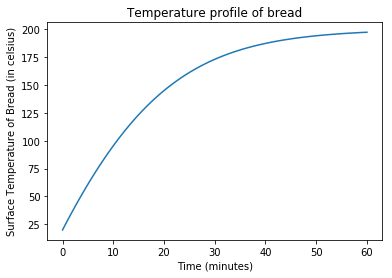

In [123]:
plt.plot(t/60,sol-273.16)
plt.xlabel("Time (minutes)")
plt.ylabel("Surface Temperature of Bread (in celsius)")
plt.title('Temperature profile of bread')

In [124]:
coeff=scipy.polyfit(t,sol,3)
T_fit=coeff[0]*t**3+coeff[1]*t**2+coeff[2]*t+coeff[3]

Text(0.5,1,'Temperature profile of bread')

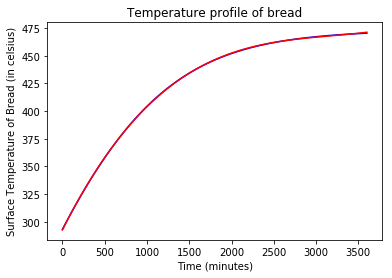

In [125]:
plt.plot(t,sol,"b")
plt.plot(t,T_fit,"r")
plt.xlabel("Time (minutes)")
plt.ylabel("Surface Temperature of Bread (in celsius)")
plt.title('Temperature profile of bread')


In [126]:
T_inf1=453
def dTbydt1(T,t):
    dTbydt1=(-h*A*(T-T_inf1)-eps*sigma*A*(T**4-T_inf1**4))/(rho*cp*V)
    return dTbydt1
sol1=scipy.integrate.odeint(dTbydt1,T0,t)
T_inf2=493
def dTbydt2(T,t):
    dTbydt2=(-h*A*(T-T_inf2)-eps*sigma*A*(T**4-T_inf2**4))/(rho*cp*V)
    return dTbydt2
sol2=scipy.integrate.odeint(dTbydt2,T0,t)

Text(0.5,1,'Temperature profile of bread')

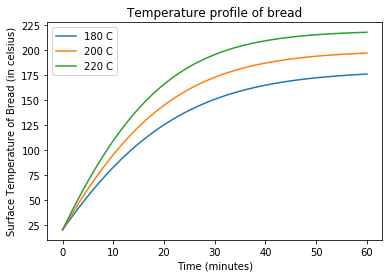

In [131]:
plt.plot(t/60,sol1-273.16, label='180 C')
plt.plot(t/60,sol-273.16,label='200 C')
plt.plot(t/60,sol2-273.16,label='220 C')
plt.legend(loc='best')
plt.xlabel("Time (minutes)")
plt.ylabel("Surface Temperature of Bread (in celsius)")
plt.title('Temperature profile of bread')

In [370]:
Mair=28.84
Mwater=18
v=28.86*10**-6
alpha=1.17*10**-7
psa=1
RH=10
D=1e-4
psat=1*10**5

In [371]:
Sc=v/D
Sc

0.28859999999999997

In [372]:
Pr=v/alpha
Pr

246.66666666666669

In [373]:
kgo=h*Mwater/Mair/psa/cp/((Sc/Pr)**(2/3))
kg=kgo*7.83*10**-3
kg
#kg=1.1*10**-7

0.0013203924265851933

In [374]:
def dWbydt(W,t):
    dWbydt=-1*kg*psat*(((100*W/(np.exp(-1*0.0056*(coeff[0]*t**3+coeff[1]*t**2+coeff[2]*t+coeff[3])+5.5)))**(-1/0.38)+1)**-1*((coeff[0]*t**3+coeff[1]*t**2+coeff[2]*t+coeff[3])**2)-(RH/100)*T_inf**2)/D/rho
    return dWbydt

In [375]:
aw=((100*W/(np.exp(-1*0.0056*(coeff[0]*t**3+coeff[1]*t**2+coeff[2]*t+coeff[3])+5.5)))**(-1/0.38)+1)**-1
aw

array([ 0.64884894,  0.66702501,  0.68433519,  0.70078196,  0.71637538,
        0.73113186,  0.74507301,  0.75822451,  0.77061518,  0.7822761 ,
        0.79323985,  0.80353986,  0.81320988,  0.82228353,  0.83079394,
        0.83877345,  0.84625342,  0.85326404,  0.85983423,  0.86599157,
        0.87176224,  0.87717103,  0.88224131,  0.8869951 ,  0.89145307,
        0.8956346 ,  0.89955783,  0.90323972,  0.9066961 ,  0.90994174,
        0.91299042,  0.91585495,  0.91854727,  0.92107851,  0.923459  ,
        0.92569837,  0.92780557,  0.92978894,  0.93165621,  0.93341462,
        0.93507086,  0.9366312 ,  0.93810145,  0.93948704,  0.94079303,
        0.94202414,  0.94318477,  0.94427905,  0.9453108 ,  0.94628363,
        0.9472009 ,  0.94806576,  0.94888117,  0.9496499 ,  0.95037456,
        0.9510576 ,  0.95170132,  0.95230791,  0.95287942,  0.95341778,
        0.95392484,  0.95440234,  0.95485193,  0.95527519,  0.95567361,
        0.95604862,  0.95640159,  0.95673384,  0.95704661,  0.95

In [376]:
sol_w=scipy.integrate.odeint(dWbydt,W0,t)
loss=(W0-sol_w)/W0*100

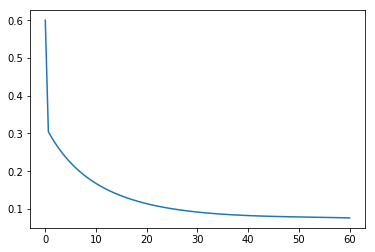

In [377]:
plt.plot(t/60,sol_w)

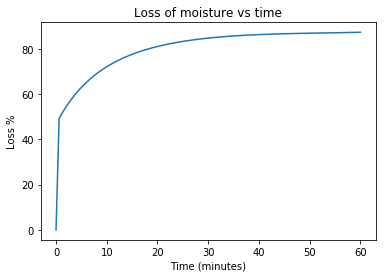

In [379]:
plt.xlabel("Time (minutes)")
plt.ylabel("Loss %")
plt.title('Loss of moisture vs time')
plt.plot(t/60,loss)

In [386]:
from tabulate input tabulate

SyntaxError: invalid syntax (<ipython-input-386-48fe2e5698af>, line 1)

In [385]:
results = [(T_fit,aw) for x in range(20, 230)]
print(tabulate(results, headers=["Temperature", "water activity"]))

SyntaxError: invalid syntax (<ipython-input-385-b4bf39612deb>, line 1)